In [128]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit import QuantumCircuit
import math
token = '6f64d5207b1dc2675b593b0ffdd2d4283feec2c386bdd84cd666b76a768ed2405c04e66f128eca830e4642ca8b42b69a7a959e180bfc58ba5cdc6a386c647283' #Removed for obvious reasons
QiskitRuntimeService.save_account(
  token=token,
  channel="ibm_quantum",
    overwrite=True
)

In [129]:
def ncz_qiskit(n: int, rot, had: bool, qc: QuantumCircuit):
    if n == 2:
        if had:
            qc.h(2)
        qc.cp(rot, 1, 2)
        qc.cx(0, 1)
        qc.cx(1, 0)
        qc.cp(-rot, 1, 2)
        qc.cx(0, 1)
        qc.cp(rot, 1, 2)
        if had:
            qc.h(2)
    else:
        if had:
            qc.h(n)
        qc.cp(rot, n-1, n)
        ncz_qiskit(n - 1, math.pi / 2, True, qc)
        qc.cp(-rot, n-1, n)
        ncz_qiskit(n - 1, math.pi / 2, True, qc)
        qc.swap(n-1, n)
        ncz_qiskit(n - 1, rot / 2, False, qc)
        qc.swap(n-1, n)
        if had:
            qc.h(n)
            
def set_element_qiskit(element: int, n: int, qc: QuantumCircuit):
    binary_string =  bin(element).removeprefix('0b')
    while len(binary_string) < n:
        binary_string = '0' + binary_string
    if '0' not in binary_string:
        return
    binary_string = reversed(binary_string)
    for idx, binary in enumerate(binary_string):
        if binary == str(0):
            qc.x(idx)
    

def grover_qiskit(n: int, element: int):
    if element >= math.pow(2, n):
        print('Element does not fall into the range [0, 2^n - 1]')
        return
    
    qc = QuantumCircuit(n)
    for i in range(n):
        qc.h(i)
        
    # num_iterations = math.floor((math.pi / 4) * math.sqrt(math.pow(2, n)))
    
    # for _ in range(num_iterations):
    set_element_qiskit(element, n, qc)
    ncz_qiskit(n - 1, math.pi / 2, False, qc)
    qc.swap(0, 1)
    set_element_qiskit(element, n, qc)
    for i in range(n):
        qc.h(i)
    for i in range(n):
        qc.x(i)
    ncz_qiskit(n - 1, math.pi / 2, False, qc)
    qc.swap(0, 1)
    for i in range(n):
        qc.x(i)
    for i in range(n):
        qc.h(i)
        
    qc.measure_all()
    
    return qc

qc = grover_qiskit(4, 1)
qc.draw()

┌───┐                                 ┌───┐                        »
   q_0: ┤ H ├──────────────────────────────■──┤ X ├────────────■───────────»
        ├───┤┌───┐                       ┌─┴─┐└─┬─┘          ┌─┴─┐         »
   q_1: ┤ H ├┤ X ├───────────────■───────┤ X ├──■───■────────┤ X ├─■───────»
        ├───┤├───┤         ┌───┐ │P(π/2) └───┘      │P(-π/2) └───┘ │P(π/2) »
   q_2: ┤ H ├┤ X ├─■───────┤ H ├─■──────────────────■──────────────■───────»
        ├───┤├───┤ │P(π/2) └───┘                                           »
   q_3: ┤ H ├┤ X ├─■───────────────────────────────────────────────────────»
        └───┘└───┘                                                         »
meas: 4/═══════════════════════════════════════════════════════════════════»
                                                                           »
«                                          ┌───┐                             »
«   q_0: ───────────────────────────────■──┤ X ├────────────■────────────────»
«                                     ┌─┴─┐└─┬─┘          ┌─┴─┐              »
«   q_1: ─────────────────────■───────┤ X ├──■───■────────┤ X ├─■────────────»
«        ┌───┐          ┌───┐ │P(π/2) └───┘      │P(-π/2) └───┘ │P(π/2) ┌───┐»
«   q_2: ┤ H ├─■────────┤ H ├─■──────────────────■──────────────■───────┤ H ├»
«        └───┘ │P(-π/2) └───┘                                           └───┘»
«   q_3: ──────■─────────────────────────────────────────────────────────────»
«                                                                            »
«meas: 4/════════════════════════════════════════════════════════════════════»
«                                                                            »
«                         ┌───┐                           ┌───┐┌───┐     »
«   q_0: ──────────────■──┤ X ├────────────■────────────X─┤ H ├┤ X ├─────»
«                    ┌─┴─┐└─┬─┘          ┌─┴─┐          │ ├───┤├───┤┌───┐»
«   q_1: ────■───────┤ X ├──■───■────────┤ X ├─■────────X─┤ X ├┤ H ├┤ X ├»
«            │P(π/4) └───┘      │P(-π/4) └───┘ │P(π/4)    ├───┤├───┤├───┤»
«   q_2: ─X──■──────────────────■──────────────■────────X─┤ X ├┤ H ├┤ X ├»
«         │                                             │ ├───┤├───┤├───┤»
«   q_3: ─X─────────────────────────────────────────────X─┤ X ├┤ H ├┤ X ├»
«                                                         └───┘└───┘└───┘»
«meas: 4/════════════════════════════════════════════════════════════════»
«                                                                        »
«                                    ┌───┐                             »
«   q_0: ─────────────────────────■──┤ X ├────────────■────────────────»
«                               ┌─┴─┐└─┬─┘          ┌─┴─┐              »
«   q_1: ───────────────■───────┤ X ├──■───■────────┤ X ├─■────────────»
«                 ┌───┐ │P(π/2) └───┘      │P(-π/2) └───┘ │P(π/2) ┌───┐»
«   q_2: ─■───────┤ H ├─■──────────────────■──────────────■───────┤ H ├»
«         │P(π/2) └───┘                                           └───┘»
«   q_3: ─■────────────────────────────────────────────────────────────»
«                                                                      »
«meas: 4/══════════════════════════════════════════════════════════════»
«                                                                      »
«                                     ┌───┐                                »
«   q_0: ──────────────────────────■──┤ X ├────────────■───────────────────»
«                                ┌─┴─┐└─┬─┘          ┌─┴─┐                 »
«   q_1: ────────────────■───────┤ X ├──■───■────────┤ X ├─■───────────────»
«                  ┌───┐ │P(π/2) └───┘      │P(-π/2) └───┘ │P(π/2) ┌───┐   »
«   q_2: ─■────────┤ H ├─■──────────────────■──────────────■───────┤ H ├─X─»
«         │P(-π/2) └───┘                                           └───┘ │ »
«   q_3: ─■──────────────────────────────────────────────────────────────X─»
«                                               

In [136]:
def grover(n: int, element: int):
    if element >= math.pow(2, n):
        print('Element does not fall into the range [0, 2^n - 1]')
        return
        
    qc = QuantumCircuit(n)
    for i in range(n):
        qc.h(i)
    
    # num_iterations = math.floor((math.pi / 4) * math.sqrt(math.pow(2, n)))
    
    # for _ in range(num_iterations): 
    set_element_qiskit(element, n, qc)
    qc.h(n - 1)  
    
    l = []
    for i in range(n-1):
        l.append(i)
    qc.mcx(l, n-1) 
    qc.h(n - 1)
    set_element_qiskit(element, n, qc)
    for i in range(n):
        qc.h(i)
    for i in range(n):
        qc.x(i)
    qc.h(n -1)
    l = []
    for i in range(n-1):
        l.append(i)
    qc.mcx(l, n-1) 
    qc.h(n -1)
    for i in range(n):
        qc.x(i)
    for i in range(n):
        qc.h(i)
    
    qc.measure_all()
    
    return qc

grover_qc = grover(4, 1)
grover_qc.draw()

┌───┐               ┌───┐┌───┐                    ┌───┐┌───┐      ░ ┌─┐»
   q_0: ┤ H ├────────────■──┤ H ├┤ X ├─────────────────■──┤ X ├┤ H ├──────░─┤M├»
        ├───┤┌───┐       │  ├───┤├───┤┌───┐            │  ├───┤├───┤      ░ └╥┘»
   q_1: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├┤ X ├────────────■──┤ X ├┤ H ├──────░──╫─»
        ├───┤├───┤       │  ├───┤├───┤├───┤            │  ├───┤├───┤      ░  ║ »
   q_2: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├┤ X ├────────────■──┤ X ├┤ H ├──────░──╫─»
        ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤├───┤┌───┐┌───┐┌─┴─┐├───┤├───┤┌───┐ ░  ║ »
   q_3: ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░──╫─»
        └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ░  ║ »
meas: 4/═════════════════════════════════════════════════════════════════════╩═»
                                                                             0 »
«                 
«   q_0: ─────────
«        ┌─┐      
«   q_1: ┤M├──────
«        └╥┘┌─┐   
«   q_2: ─╫─┤M├───
«         ║ └╥┘┌─┐
«   q_3: ─╫──╫─┤M├
«         ║  ║ └╥┘
«meas: 4/═╩══╩══╩═
«         1  2  3

In [131]:
def grover_3_all_to_all(element: int):
    qc = QuantumCircuit(3)
    
    qc.h(0)
    qc.h(1)
    qc.h(2)
    
    set_element_qiskit(element, 3, qc)
    
    qc.h(2)
    
    qc.ccx(0, 1, 2)
    
    qc.h(2)
    
    set_element_qiskit(element, 3, qc)
    
    qc.h(0)
    qc.h(1)
    qc.h(2)
    
    qc.x(0)
    qc.x(1)
    qc.x(2)
    
    qc.h(2)
    
    qc.ccx(0, 1, 2)
    
    qc.h(2)
    
    qc.x(0)
    qc.x(1)
    qc.x(2)
    
    qc.h(0)
    qc.h(1)
    qc.h(2)
    
    qc.measure_all()
    
    return qc

grover_3_all_to_all_cq = grover_3_all_to_all(4)
grover_3_all_to_all_cq.draw(scale=10)

┌───┐┌───┐     ┌───┐┌───┐┌───┐          ┌───┐┌───┐      ░ ┌─┐      
   q_0: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░─┤M├──────
        ├───┤├───┤  │  ├───┤├───┤├───┤       │  ├───┤├───┤      ░ └╥┘┌─┐   
   q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░──╫─┤M├───
        ├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ░  ║ └╥┘┌─┐
   q_2: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░──╫──╫─┤M├
        └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ░  ║  ║ └╥┘
meas: 3/═══════════════════════════════════════════════════════════╩══╩══╩═
                                                                   0  1  2

In [132]:
def grover_3_linear(element: int):
    qc = QuantumCircuit(3)
    qc.h(0)
    qc.h(1)
    qc.h(2)
    
    qc.x(0)
    qc.x(1)
    
    qc.cp(math.pi / 2, 1, 2)
    qc.cx(0, 1)
    qc.cx(1, 0)
    qc.cp(- math.pi / 2, 1, 2)
    qc.cx(0, 1)
    qc.cp(math.pi / 2, 1, 2)
    qc.swap(0, 1)
    
    qc.x(0)
    qc.x(1)
    
    qc.h(0)
    qc.h(1)
    qc.h(2)
    
    qc.x(0)
    qc.x(1)
    qc.x(2)
    
    qc.cp(math.pi / 2, 1, 2)
    qc.cx(0, 1)
    qc.cx(1, 0)
    qc.cp(- math.pi / 2, 1, 2)
    qc.cx(0, 1)
    qc.cp(math.pi / 2, 1, 2)
    qc.swap(0, 1)
    
    qc.x(0)
    qc.x(1)
    qc.x(2)
    
    qc.h(0)
    qc.h(1)
    qc.h(2)
    
    qc.measure_all()

    return qc
grover_3_linear_cq = grover_3_linear(4)
grover_3_linear_cq.draw()

┌───┐┌───┐              ┌───┐                             ┌───┐┌───┐»
   q_0: ┤ H ├┤ X ├───────────■──┤ X ├────────────■─────────────X──┤ X ├┤ H ├»
        ├───┤├───┤         ┌─┴─┐└─┬─┘          ┌─┴─┐           │  ├───┤├───┤»
   q_1: ┤ H ├┤ X ├─■───────┤ X ├──■───■────────┤ X ├─■─────────X──┤ X ├┤ H ├»
        ├───┤└───┘ │P(π/2) └───┘      │P(-π/2) └───┘ │P(π/2) ┌───┐├───┤└───┘»
   q_2: ┤ H ├──────■──────────────────■──────────────■───────┤ H ├┤ X ├─────»
        └───┘                                                └───┘└───┘     »
meas: 3/════════════════════════════════════════════════════════════════════»
                                                                            »
«        ┌───┐              ┌───┐                             ┌───┐┌───┐ ░ ┌─┐»
«   q_0: ┤ X ├───────────■──┤ X ├────────────■─────────────X──┤ X ├┤ H ├─░─┤M├»
«        ├───┤         ┌─┴─┐└─┬─┘          ┌─┴─┐           │  ├───┤├───┤ ░ └╥┘»
«   q_1: ┤ X ├─■───────┤ X ├──■───■────────┤ X ├─■─────────X──┤ X ├┤ H ├─░──╫─»
«        └───┘ │P(π/2) └───┘      │P(-π/2) └───┘ │P(π/2) ┌───┐├───┤└───┘ ░  ║ »
«   q_2: ──────■──────────────────■──────────────■───────┤ X ├┤ H ├──────░──╫─»
«                                                        └───┘└───┘      ░  ║ »
«meas: 3/═══════════════════════════════════════════════════════════════════╩═»
«                                                                           0 »
«              
«   q_0: ──────
«        ┌─┐   
«   q_1: ┤M├───
«        └╥┘┌─┐
«   q_2: ─╫─┤M├
«         ║ └╥┘
«meas: 3/═╩══╩═
«         1  2

In [137]:
from qiskit_ibm_runtime import SamplerV2
from qiskit import transpile

def ibm_hardware(n: int, circuit: QuantumCircuit):
    service = QiskitRuntimeService()
    backend = service.least_busy(operational=True, simulator=False)
    transpiled_circuit = transpile(circuit, backend)
    
    results = []
    
    for i in range(n):
        sampler = SamplerV2(backend)
        job = sampler.run([transpiled_circuit])
        results.append(job.result())
    return results

In [138]:
# results = ibm_hardware(10, qc)
results = ibm_hardware(10, grover_qc)
# results = ibm_hardware(10, grover_3_all_to_all_cq)
# results = ibm_hardware(10, grover_3_linear_cq)

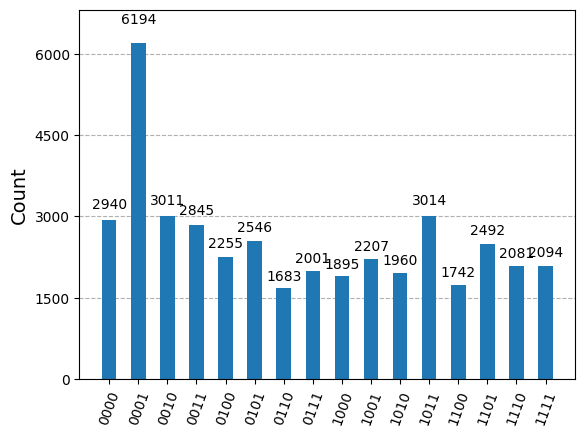

In [139]:
from qiskit.visualization import plot_histogram
from collections import Counter

counts_list = []

for i in results:
    res = i[0]
    data = res.data
    counts = res.data.meas.get_counts()
    counts_list.append(counts)

aggregate_counts = Counter()
for c in counts_list:
    aggregate_counts.update(c)
    
aggregated_dict = dict(aggregate_counts)

plot_histogram(aggregated_dict)